In [39]:
import os
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import patches as mpatches
import numpy as np
from scipy.sparse import csr_matrix
from scipy.stats import ks_2samp
import anndata
import scanpy
import string
import seaborn as sns
import h5py
import tifffile
import fs
from fs import open_fs
from matplotlib_scalebar.scalebar import ScaleBar
from tqdm import tqdm
import scanpy as sc
import scvi
import sys 

sys.path.append('/Desktop/colitis/')

mpl.rcParams.update(mpl.rcParamsDefault) #Reset rcParams to default
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']  # Colors in this style

# Plotting style function (run this before plotting the final figure)
def set_plotting_style():
    plt.style.use('seaborn-paper')
    plt.rc('axes', labelsize=12)
    plt.rc('axes', titlesize=12)
    plt.rc('xtick', labelsize=10)
    plt.rc('ytick', labelsize=10)
    plt.rc('legend', fontsize=10)
    plt.rc('text.latex', preamble=r'\usepackage{sfmath}')
    plt.rc('xtick.major', pad=2)
    plt.rc('ytick.major', pad=2)
    plt.rc('mathtext', fontset='stixsans', sf='sansserif')
    plt.rc('figure', figsize=[10,9])
    plt.rc('svg', fonttype='none')

In [40]:
adata = sc.read_h5ad('Biopsy_RNA_Final.h5ad')
list_clusters_coarse = adata.obs["220414 JH COARSE"].unique()
list_clusters_fine = adata.obs["220414 JH FINE"].unique()
adata.obs["220414 JH FINE"]

AAACCTGAGACAATAC-1_1     CD4T naive
AAACCTGAGACCGGAT-1_1     Plasma IgA
AAACCTGAGGCTCTTA-1_1    CD4T memory
AAACCTGAGTGCAAGC-1_1        CD4T RM
AAACCTGCAAAGTGCG-1_1     CD8T naive
                           ...     
TTTGTCACATCCCACT-1_8     Plasma IgA
TTTGTCACATCCTTGC-1_8        CD8T RM
TTTGTCAGTCGTGGCT-1_8     Plasma IgG
TTTGTCATCAGAGACG-1_8      Cycling T
TTTGTCATCATGCATG-1_8     Plasma IgM
Name: 220414 JH FINE, Length: 50845, dtype: category
Categories (54, object): ['B NOS', 'B cycling', 'B memory', 'B naive', ..., 'Plasma IgA', 'Plasma IgG', 'Plasma IgM', 'Plasma cells NOS']

In [41]:
df_gene_sets = pd.read_csv('biopsy_dotplot_genes.csv')
df_gene_sets

,BIOPSY COARSE,Unnamed: 1
0,B cells,"CD79A, MS4A1, CD19"
1,CD4T,"CD3D, IL7R, CD4, CD40LG"
2,CD8T,"CD8A, CD8B, GZMA"
3,Cycling,"MKI67, TYMS, STMN1"
4,Endothelial,"PLVAP, RAMP2, EGFL7, PECAM1, CLDN5"
...,...,...
75,Mesenchymal stromal S3,"C7, OGN, ASPN"
76,Mesenchymal stromal S4,"CD74, C3, CCL19"
77,Mesenchymal stromal activated fibroblast,"TIMP1, IL1R1, MMP3, MMP1"
78,Mesenchymal stromal myofibroblast,"VIM, ACTA2, TAGLN"


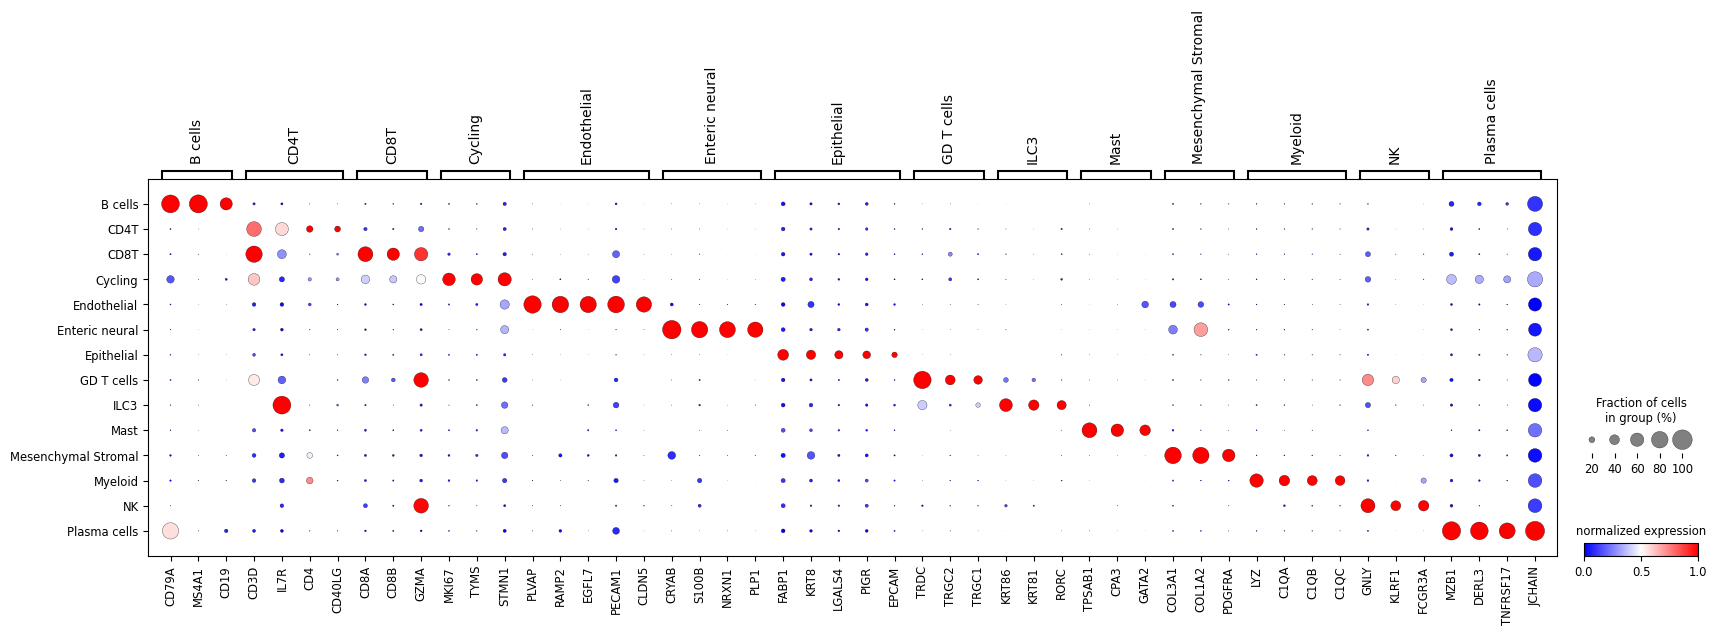

In [42]:
#biopsy COARSE
gene_set_biopsies_coarse = df_gene_sets.iloc[0:14,:]

cell_types = gene_set_biopsies_coarse["BIOPSY COARSE"]
cell_types = cell_types.tolist()
cell_type = cell_types[0]
gene_set_biopsies_coarse[gene_set_biopsies_coarse['BIOPSY COARSE']==cell_type].iloc[0,1].split(', ')
TS_marker_genes_coarse = {}
for i in range(0,len(cell_types)):
    # define the cell-type
    cell_type = cell_types[i]
    # extract the values along the row (cell-type)
    gene_list_temp = gene_set_biopsies_coarse[gene_set_biopsies_coarse['BIOPSY COARSE']==cell_type].iloc[0,1].split(', ')
#     # get rid of NaNs from the list
#     gene_list = [item for item in gene_list_temp if not (pd.isnull(gene_list_temp))]
    # match the key (cell-type) to the element (a list of marker genes)
    TS_marker_genes_coarse[cell_type] = gene_list_temp


sc.pl.dotplot(adata, TS_marker_genes_coarse, groupby="220414 JH COARSE", 
              colorbar_title='normalized expression',cmap='bwr', standard_scale='var',
              save= 'BIOPSY_COARSE_RNA.pdf')


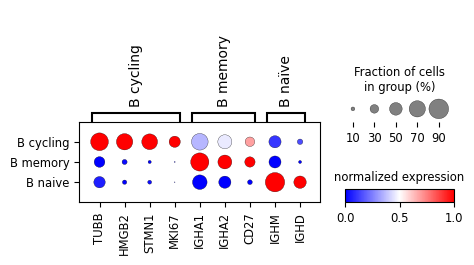

In [43]:
#FINE B
gene_set_biopsies_coarse = df_gene_sets.iloc[16:19,:]
adata_bioB= adata[adata.obs['220414 JH FINE'].isin(['B cycling', 'B memory', 'B naive'])]

cell_types = gene_set_biopsies_coarse["BIOPSY COARSE"]
cell_types = cell_types.tolist()
cell_type = cell_types[0]
gene_set_biopsies_coarse[gene_set_biopsies_coarse['BIOPSY COARSE']==cell_type].iloc[0,1].split(', ')
TS_marker_genes_coarse = {}
for i in range(0,len(cell_types)):
    # define the cell-type
    cell_type = cell_types[i]
    # extract the values along the row (cell-type)
    gene_list_temp = gene_set_biopsies_coarse[gene_set_biopsies_coarse['BIOPSY COARSE']==cell_type].iloc[0,1].split(', ')
#     # get rid of NaNs from the list
#     gene_list = [item for item in gene_list_temp if not (pd.isnull(gene_list_temp))]
    # match the key (cell-type) to the element (a list of marker genes)
    TS_marker_genes_coarse[cell_type] = gene_list_temp


sc.pl.dotplot(adata_bioB, TS_marker_genes_coarse, groupby="220414 JH FINE", 
              colorbar_title='normalized expression',cmap='bwr', standard_scale='var',
              save= 'BIOPSY_FINE_B.pdf')

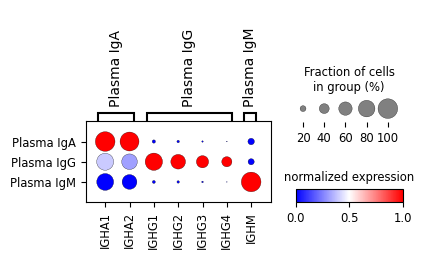

In [44]:
#FINE PLASMA
adata_bioPlasma= adata[adata.obs['220414 JH FINE'].isin(['Plasma IgA', 'Plasma IgG', 'Plasma IgM'])]
gene_set_biopsies_coarse = df_gene_sets.iloc[50:53,:]

cell_types = gene_set_biopsies_coarse["BIOPSY COARSE"]
cell_types = cell_types.tolist()
cell_type = cell_types[0]
gene_set_biopsies_coarse[gene_set_biopsies_coarse['BIOPSY COARSE']==cell_type].iloc[0,1].split(', ')
TS_marker_genes_coarse = {}
for i in range(0,len(cell_types)):
    # define the cell-type
    cell_type = cell_types[i]
    # extract the values along the row (cell-type)
    gene_list_temp = gene_set_biopsies_coarse[gene_set_biopsies_coarse['BIOPSY COARSE']==cell_type].iloc[0,1].split(', ')
#     # get rid of NaNs from the list
#     gene_list = [item for item in gene_list_temp if not (pd.isnull(gene_list_temp))]
    # match the key (cell-type) to the element (a list of marker genes)
    TS_marker_genes_coarse[cell_type] = gene_list_temp


sc.pl.dotplot(adata_bioPlasma, TS_marker_genes_coarse, groupby="220414 JH FINE", 
              colorbar_title='normalized expression',cmap='bwr', standard_scale='var',
              save= 'BIOPSY_FINE_PLASMA.pdf')

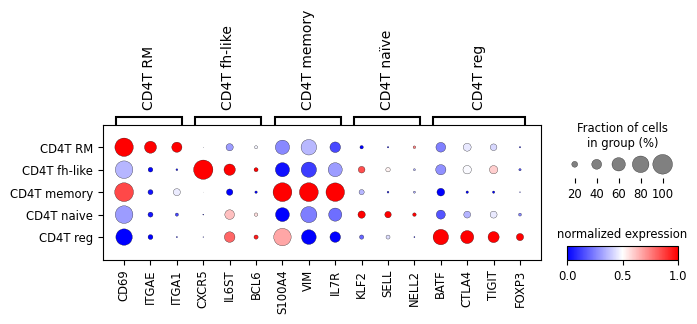

In [45]:
#FINE CD4T
adata_bioCD4T= adata[adata.obs['220414 JH FINE'].isin(['CD4T fh-like', 'CD4T memory', 'CD4T naive', 'CD4T reg', 'CD4T RM'])]
gene_set_biopsies_coarse = df_gene_sets.iloc[23:28,:]

cell_types = gene_set_biopsies_coarse["BIOPSY COARSE"]
cell_types = cell_types.tolist()
cell_type = cell_types[0]
gene_set_biopsies_coarse[gene_set_biopsies_coarse['BIOPSY COARSE']==cell_type].iloc[0,1].split(', ')
TS_marker_genes_coarse = {}
for i in range(0,len(cell_types)):
    # define the cell-type
    cell_type = cell_types[i]
    # extract the values along the row (cell-type)
    gene_list_temp = gene_set_biopsies_coarse[gene_set_biopsies_coarse['BIOPSY COARSE']==cell_type].iloc[0,1].split(', ')
#     # get rid of NaNs from the list
#     gene_list = [item for item in gene_list_temp if not (pd.isnull(gene_list_temp))]
    # match the key (cell-type) to the element (a list of marker genes)
    TS_marker_genes_coarse[cell_type] = gene_list_temp


sc.pl.dotplot(adata_bioCD4T, TS_marker_genes_coarse, groupby="220414 JH FINE", 
              colorbar_title='normalized expression', cmap='bwr', standard_scale='var',
              save= 'BIOPSY_FINE_CD4T.pdf')

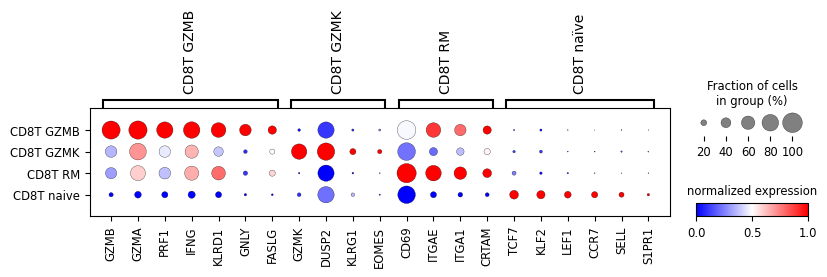

In [46]:
#FINE CD8T
adata_bioCD8T= adata[adata.obs['220414 JH FINE'].isin(['CD8T GZMB','CD8T GZMK','CD8T naive', 'CD8T RM'])]
gene_set_biopsies_coarse = df_gene_sets.iloc[31:35,:]

cell_types = gene_set_biopsies_coarse["BIOPSY COARSE"]
cell_types = cell_types.tolist()
cell_type = cell_types[0]
gene_set_biopsies_coarse[gene_set_biopsies_coarse['BIOPSY COARSE']==cell_type].iloc[0,1].split(', ')
TS_marker_genes_coarse = {}
for i in range(0,len(cell_types)):
    # define the cell-type
    cell_type = cell_types[i]
    # extract the values along the row (cell-type)
    gene_list_temp = gene_set_biopsies_coarse[gene_set_biopsies_coarse['BIOPSY COARSE']==cell_type].iloc[0,1].split(', ')
#     # get rid of NaNs from the list
#     gene_list = [item for item in gene_list_temp if not (pd.isnull(gene_list_temp))]
    # match the key (cell-type) to the element (a list of marker genes)
    TS_marker_genes_coarse[cell_type] = gene_list_temp


sc.pl.dotplot(adata_bioCD8T, TS_marker_genes_coarse, groupby="220414 JH FINE", 
              colorbar_title='normalized expression', cmap='bwr', standard_scale='var',
              save= 'BIOPSY_FINE_CD8T.pdf')

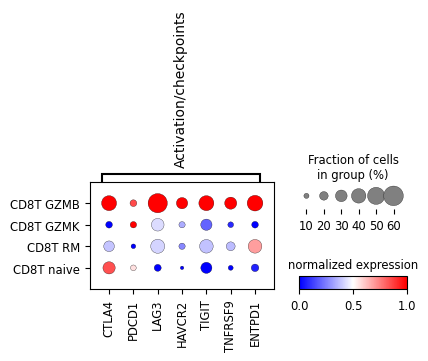

In [47]:
#CD8T checkpoint activation
#FINE CD8T
adata_bioCD8T= adata[adata.obs['220414 JH FINE'].isin(['CD8T GZMB','CD8T GZMK','CD8T naive', 'CD8T RM'])]
gene_set_biopsies_coarse = df_gene_sets.iloc[35:36,:]

cell_types = gene_set_biopsies_coarse["BIOPSY COARSE"]
cell_types = cell_types.tolist()
cell_type = cell_types[0]
gene_set_biopsies_coarse[gene_set_biopsies_coarse['BIOPSY COARSE']==cell_type].iloc[0,1].split(', ')
TS_marker_genes_coarse = {}
for i in range(0,len(cell_types)):
    # define the cell-type
    cell_type = cell_types[i]
    # extract the values along the row (cell-type)
    gene_list_temp = gene_set_biopsies_coarse[gene_set_biopsies_coarse['BIOPSY COARSE']==cell_type].iloc[0,1].split(', ')
#     # get rid of NaNs from the list
#     gene_list = [item for item in gene_list_temp if not (pd.isnull(gene_list_temp))]
    # match the key (cell-type) to the element (a list of marker genes)
    TS_marker_genes_coarse[cell_type] = gene_list_temp


sc.pl.dotplot(adata_bioCD8T, TS_marker_genes_coarse, groupby="220414 JH FINE", 
              colorbar_title='normalized expression', cmap='bwr', standard_scale='var',
              save= 'BIOPSY_FINE_CD8Tcheckpoint.pdf')

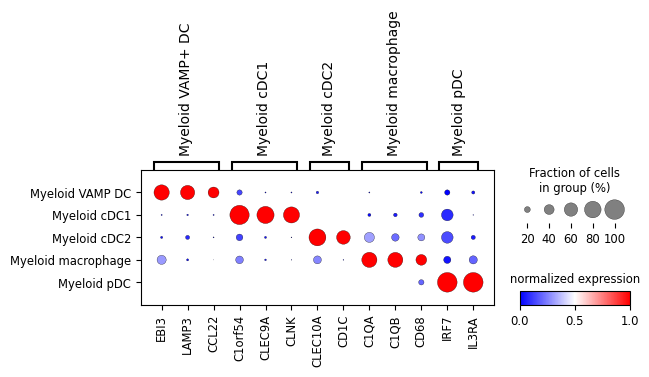

In [48]:
#FINE myeloid
adata_bioMyeloid = adata[adata.obs['220414 JH FINE'].isin(['Myeloid VAMP DC', 'Myeloid cDC1', 'Myeloid cDC2', 'Myeloid macrophage', 'Myeloid pDC'])]
gene_set_biopsies_coarse = df_gene_sets.iloc[41:46,:]

cell_types = gene_set_biopsies_coarse["BIOPSY COARSE"]
cell_types = cell_types.tolist()
cell_type = cell_types[0]
gene_set_biopsies_coarse[gene_set_biopsies_coarse['BIOPSY COARSE']==cell_type].iloc[0,1].split(', ')
TS_marker_genes_coarse = {}
for i in range(0,len(cell_types)):
    # define the cell-type
    cell_type = cell_types[i]
    # extract the values along the row (cell-type)
    gene_list_temp = gene_set_biopsies_coarse[gene_set_biopsies_coarse['BIOPSY COARSE']==cell_type].iloc[0,1].split(', ')
#     # get rid of NaNs from the list
#     gene_list = [item for item in gene_list_temp if not (pd.isnull(gene_list_temp))]
    # match the key (cell-type) to the element (a list of marker genes)
    TS_marker_genes_coarse[cell_type] = gene_list_temp


sc.pl.dotplot(adata_bioMyeloid, TS_marker_genes_coarse, groupby="220414 JH FINE", 
              colorbar_title='normalized expression',cmap='bwr', standard_scale='var',
              save= 'BIOPSY_FINE_MNP.pdf')

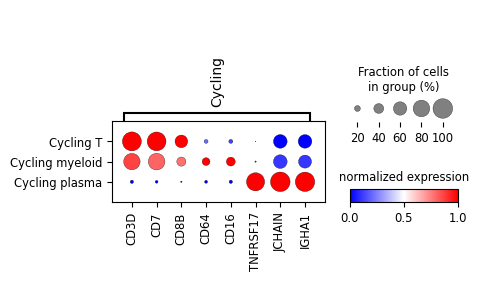

In [49]:
#FINE cycling
adata_cycling= adata[adata.obs['220414 JH FINE'].isin(['Cycling plasma', 'Cycling T', 'Cycling myeloid'])]
gene_set_biopsies_coarse = df_gene_sets.iloc[54:55,:]

cell_types = gene_set_biopsies_coarse["BIOPSY COARSE"]
cell_types = cell_types.tolist()
cell_type = cell_types[0]
gene_set_biopsies_coarse[gene_set_biopsies_coarse['BIOPSY COARSE']==cell_type].iloc[0,1].split(', ')
TS_marker_genes_coarse = {}
for i in range(0,len(cell_types)):
    # define the cell-type
    cell_type = cell_types[i]
    # extract the values along the row (cell-type)
    gene_list_temp = gene_set_biopsies_coarse[gene_set_biopsies_coarse['BIOPSY COARSE']==cell_type].iloc[0,1].split(', ')
#     # get rid of NaNs from the list
#     gene_list = [item for item in gene_list_temp if not (pd.isnull(gene_list_temp))]
    # match the key (cell-type) to the element (a list of marker genes)
    TS_marker_genes_coarse[cell_type] = gene_list_temp


sc.pl.dotplot(adata_cycling, TS_marker_genes_coarse, groupby="220414 JH FINE", 
              colorbar_title='normalized expression',cmap='bwr', standard_scale='var',
              save= 'BIOPSY_FINE_cycling.pdf')

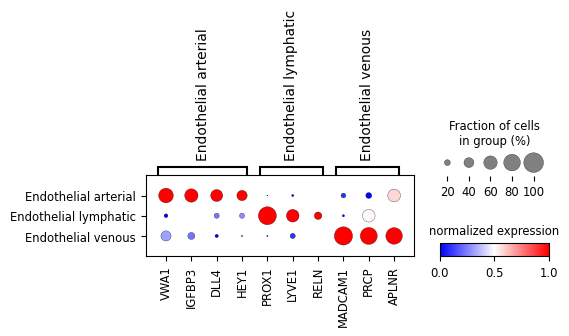

In [50]:
#FINE endo
adata_endo = adata[adata.obs['220414 JH FINE'].isin(['Endothelial arterial', 'Endothelial lymphatic', 'Endothelial venous'])]
gene_set_biopsies_coarse = df_gene_sets.iloc[59:62,:]

cell_types = gene_set_biopsies_coarse["BIOPSY COARSE"]
cell_types = cell_types.tolist()
cell_type = cell_types[0]
gene_set_biopsies_coarse[gene_set_biopsies_coarse['BIOPSY COARSE']==cell_type].iloc[0,1].split(', ')
TS_marker_genes_coarse = {}
for i in range(0,len(cell_types)):
    # define the cell-type
    cell_type = cell_types[i]
    # extract the values along the row (cell-type)
    gene_list_temp = gene_set_biopsies_coarse[gene_set_biopsies_coarse['BIOPSY COARSE']==cell_type].iloc[0,1].split(', ')
#     # get rid of NaNs from the list
#     gene_list = [item for item in gene_list_temp if not (pd.isnull(gene_list_temp))]
    # match the key (cell-type) to the element (a list of marker genes)
    TS_marker_genes_coarse[cell_type] = gene_list_temp


sc.pl.dotplot(adata_endo, TS_marker_genes_coarse, groupby="220414 JH FINE", 
              colorbar_title='normalized expression',cmap='bwr', standard_scale='var',
              save= 'BIOPSY_FINE_endo.pdf')

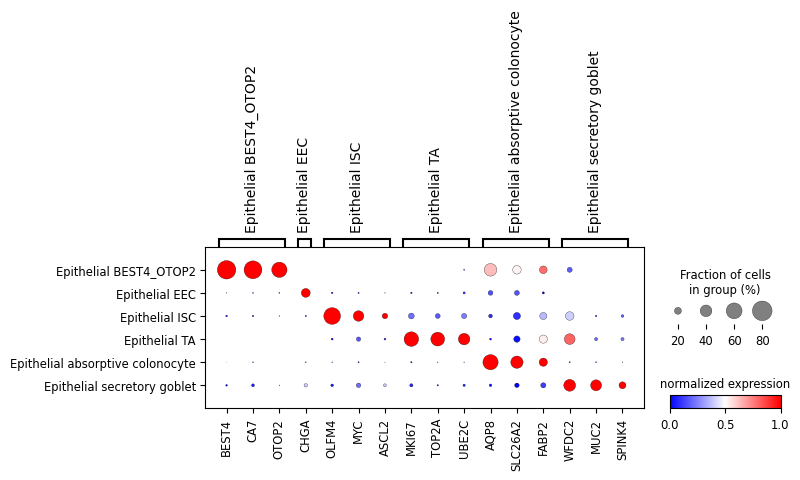

In [51]:
#FINE epi
adata_epi = adata[adata.obs['220414 JH FINE'].isin(['Epithelial absorptive colonocyte', 'Epithelial BEST4_OTOP2', 'Epithelial EEC', 
                                                          'Epithelial ISC', 'Epithelial secretory goblet', 'Epithelial TA'])]
gene_set_biopsies_coarse = df_gene_sets.iloc[64:70,:]

cell_types = gene_set_biopsies_coarse["BIOPSY COARSE"]
cell_types = cell_types.tolist()
cell_type = cell_types[0]
gene_set_biopsies_coarse[gene_set_biopsies_coarse['BIOPSY COARSE']==cell_type].iloc[0,1].split(', ')
TS_marker_genes_coarse = {}
for i in range(0,len(cell_types)):
    # define the cell-type
    cell_type = cell_types[i]
    # extract the values along the row (cell-type)
    gene_list_temp = gene_set_biopsies_coarse[gene_set_biopsies_coarse['BIOPSY COARSE']==cell_type].iloc[0,1].split(', ')
#     # get rid of NaNs from the list
#     gene_list = [item for item in gene_list_temp if not (pd.isnull(gene_list_temp))]
    # match the key (cell-type) to the element (a list of marker genes)
    TS_marker_genes_coarse[cell_type] = gene_list_temp


sc.pl.dotplot(adata_epi, TS_marker_genes_coarse, groupby="220414 JH FINE", 
              colorbar_title='normalized expression',cmap='bwr', standard_scale='var',
              save= 'BIOPSY_FINE_epi.pdf')

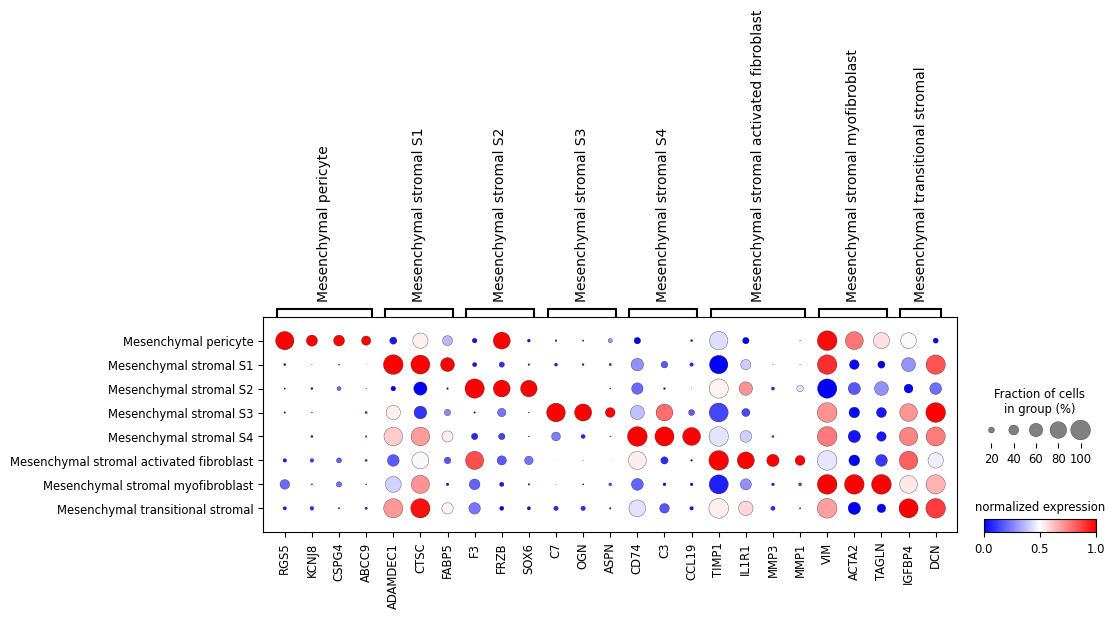

In [52]:
#FINE mes
adata_mes = adata[adata.obs['220414 JH FINE'].isin(['Mesenchymal pericyte', 'Mesenchymal stromal activated fibroblast', 
                                                          'Mesenchymal stromal myofibroblast', 'Mesenchymal stromal S1', 
                                                          'Mesenchymal stromal S2', 'Mesenchymal stromal S3', 'Mesenchymal stromal S4', 
                                                          'Mesenchymal transitional stromal'])]
gene_set_biopsies_coarse = df_gene_sets.iloc[72:80,:]

cell_types = gene_set_biopsies_coarse["BIOPSY COARSE"]
cell_types = cell_types.tolist()
cell_type = cell_types[0]
gene_set_biopsies_coarse[gene_set_biopsies_coarse['BIOPSY COARSE']==cell_type].iloc[0,1].split(', ')
TS_marker_genes_coarse = {}
for i in range(0,len(cell_types)):
    # define the cell-type
    cell_type = cell_types[i]
    # extract the values along the row (cell-type)
    gene_list_temp = gene_set_biopsies_coarse[gene_set_biopsies_coarse['BIOPSY COARSE']==cell_type].iloc[0,1].split(', ')
#     # get rid of NaNs from the list
#     gene_list = [item for item in gene_list_temp if not (pd.isnull(gene_list_temp))]
    # match the key (cell-type) to the element (a list of marker genes)
    TS_marker_genes_coarse[cell_type] = gene_list_temp


sc.pl.dotplot(adata_mes, TS_marker_genes_coarse, groupby="220414 JH FINE", 
              colorbar_title='normalized expression',cmap='bwr', standard_scale='var',
              save= 'BIOPSY_FINE_mes.pdf')

<h1> BLOOD DOTPLOTS <h1>

In [53]:
adata = sc.read_h5ad('Blood_RNA_Final.h5ad')
list_clusters_fine = adata.obs["220414 JH FINE"].unique()
list_clusters_coarse = adata.obs["220414 JH COARSE"].unique()
adata.obs["220414 JH COARSE"]

list_clusters_coarse

['CD4T', 'Myeloid', 'CD8T', 'NK', 'B cells', 'Cycling', 'unassigned', 'Platelets', 'Plasma cells', 'pDCs']
Categories (10, object): ['B cells', 'CD4T', 'CD8T', 'Cycling', ..., 'Plasma cells', 'Platelets', 'pDCs', 'unassigned']

In [60]:
df_gene_sets = pd.read_csv('blood_dotplot_genes.csv')
df_gene_sets

,BLOOD COARSE,Unnamed: 1
0,B CELLS,"CD79A, MS4A1, CD19, CD24"
1,CD4T,"CD3D, IL7R, MAL, CD4"
2,CD8T,"CD8A, CD8B, GZMK"
3,CYCLING,"STMN1, TYMS, MKI67"
4,MONONUCLEAR PHAGOCYTES,"CST3, LYZ, LST1, IL1B"
5,NK,"NKG7, GNLY, FCGR3A, KLRF1"
6,PLASMA CELLS,"MZB1, JCHAIN, TNFRSF17"
7,PLATELETS,"PPBP, PF4, GP9"
8,pDCs,"LILRA4, CLEC4C, LRRC26, SCT"
9,unassigned,NaN


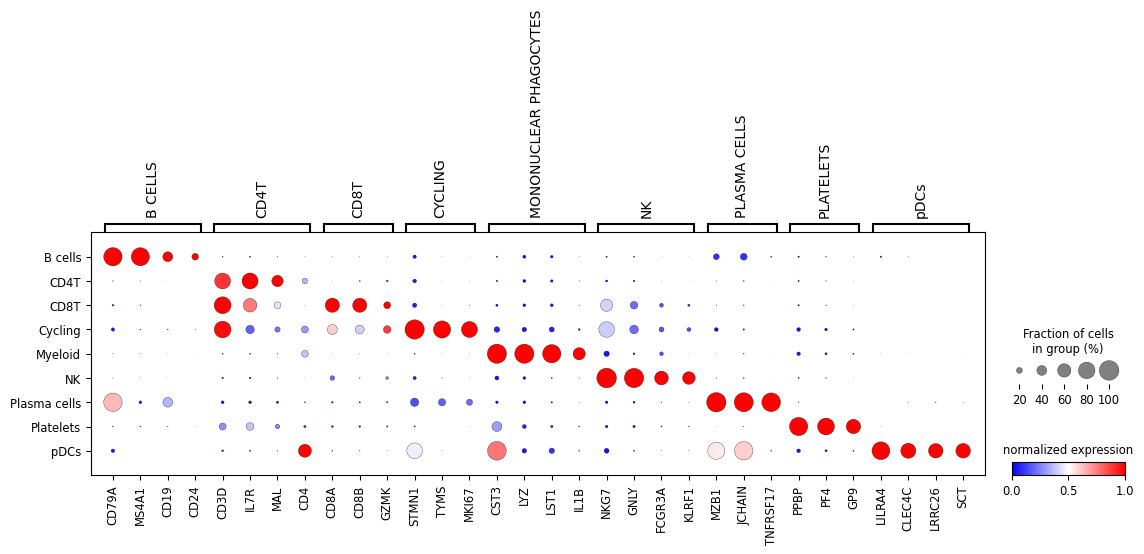

In [56]:
#RNA COARSE
adata_bloodCOARSE = adata[adata.obs['220414 JH COARSE'].isin(['B cells',  'CD8T', 'CD4T','Cycling',  'Myeloid','NK', 'Plasma cells','Platelets', 'pDCs'])]

gene_set_blood_coarse = df_gene_sets.iloc[:9,:]

cell_types = gene_set_blood_coarse["BLOOD COARSE"]
cell_types = cell_types.tolist()
cell_type = cell_types[0]
gene_set_blood_coarse[gene_set_blood_coarse['BLOOD COARSE']==cell_type].iloc[0,1].split(', ')
TS_marker_genes_coarse = {}
for i in range(0,len(cell_types)):
    # define the cell-type
    cell_type = cell_types[i]
    # extract the values along the row (cell-type)
    gene_list_temp = gene_set_blood_coarse[gene_set_blood_coarse['BLOOD COARSE']==cell_type].iloc[0,1].split(', ')
#     # get rid of NaNs from the list
#     gene_list = [item for item in gene_list_temp if not (pd.isnull(gene_list_temp))]
    # match the key (cell-type) to the element (a list of marker genes)
    TS_marker_genes_coarse[cell_type] = gene_list_temp


sc.pl.dotplot(adata_bloodCOARSE, TS_marker_genes_coarse, groupby="220414 JH COARSE", 
              colorbar_title='normalized expression',cmap='bwr', standard_scale='var', 
              save= 'BLOOD_COARSE_RNA.pdf')

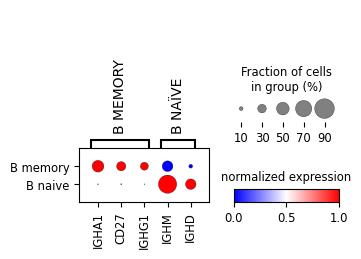

In [57]:
#FINE B
adata_bloodB = adata[adata.obs['220414 JH FINE'].isin(['B memory', 'B naive'])]
gene_set_blood_coarse = df_gene_sets.iloc[12:14,:]

cell_types = gene_set_blood_coarse["BLOOD COARSE"]
cell_types = cell_types.tolist()
cell_type = cell_types[0]
gene_set_blood_coarse[gene_set_blood_coarse['BLOOD COARSE']==cell_type].iloc[0,1].split(', ')
TS_marker_genes_coarse = {}
for i in range(0,len(cell_types)):
    # define the cell-type
    cell_type = cell_types[i]
    # extract the values along the row (cell-type)
    gene_list_temp = gene_set_blood_coarse[gene_set_blood_coarse['BLOOD COARSE']==cell_type].iloc[0,1].split(', ')
#     # get rid of NaNs from the list
#     gene_list = [item for item in gene_list_temp if not (pd.isnull(gene_list_temp))]
    # match the key (cell-type) to the element (a list of marker genes)
    TS_marker_genes_coarse[cell_type] = gene_list_temp


sc.pl.dotplot(adata_bloodB, TS_marker_genes_coarse, groupby="220414 JH FINE", 
              colorbar_title='normalized expression',cmap='bwr', standard_scale='var', 
              save= 'BLOOD_FINE_B.pdf')

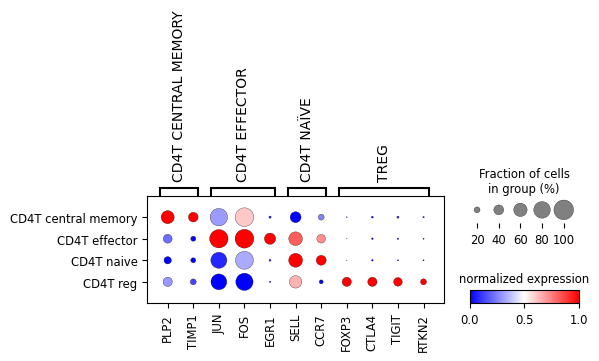

In [58]:
#FINE CD4T
adata_bloodCD4T= adata[adata.obs['220414 JH FINE'].isin(['CD4T central memory', 'CD4T effector', 'CD4T naive', 'CD4T reg'])]
gene_set_blood_coarse = df_gene_sets.iloc[16:20,:]

cell_types = gene_set_blood_coarse["BLOOD COARSE"]
cell_types = cell_types.tolist()
cell_type = cell_types[0]
gene_set_blood_coarse[gene_set_blood_coarse['BLOOD COARSE']==cell_type].iloc[0,1].split(', ')
TS_marker_genes_coarse = {}
for i in range(0,len(cell_types)):
    # define the cell-type
    cell_type = cell_types[i]
    # extract the values along the row (cell-type)
    gene_list_temp = gene_set_blood_coarse[gene_set_blood_coarse['BLOOD COARSE']==cell_type].iloc[0,1].split(', ')
#     # get rid of NaNs from the list
#     gene_list = [item for item in gene_list_temp if not (pd.isnull(gene_list_temp))]
    # match the key (cell-type) to the element (a list of marker genes)
    TS_marker_genes_coarse[cell_type] = gene_list_temp


sc.pl.dotplot(adata_bloodCD4T, TS_marker_genes_coarse, groupby="220414 JH FINE", 
              colorbar_title='normalized expression',cmap='bwr', standard_scale='var', 
              save= 'BLOOD_FINE_CD4T.pdf')

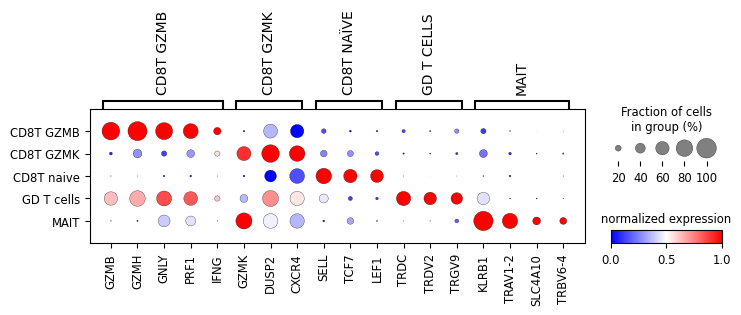

In [59]:
#FINE CD8T
adata_bloodCD8T= adata[adata.obs['220414 JH FINE'].isin(['CD8T GZMB', 'CD8T GZMK', 'CD8T naive', 'GD T cells', 'MAIT'])]
gene_set_blood_coarse = df_gene_sets.iloc[22:27,:]

cell_types = gene_set_blood_coarse["BLOOD COARSE"]
cell_types = cell_types.tolist()
cell_type = cell_types[0]
gene_set_blood_coarse[gene_set_blood_coarse['BLOOD COARSE']==cell_type].iloc[0,1].split(', ')
TS_marker_genes_coarse = {}
for i in range(0,len(cell_types)):
    # define the cell-type
    cell_type = cell_types[i]
    # extract the values along the row (cell-type)
    gene_list_temp = gene_set_blood_coarse[gene_set_blood_coarse['BLOOD COARSE']==cell_type].iloc[0,1].split(', ')
#     # get rid of NaNs from the list
#     gene_list = [item for item in gene_list_temp if not (pd.isnull(gene_list_temp))]
    # match the key (cell-type) to the element (a list of marker genes)
    TS_marker_genes_coarse[cell_type] = gene_list_temp


sc.pl.dotplot(adata_bloodCD8T, TS_marker_genes_coarse, groupby="220414 JH FINE", 
              colorbar_title='normalized expression',cmap='bwr', standard_scale='var',
              save= 'BLOOD_FINE_CD8T.pdf')

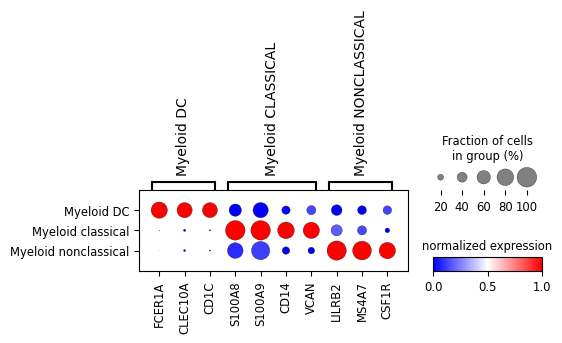

In [61]:
#FINE MNP
adata_bloodmyeloid = adata[adata.obs['220414 JH FINE'].isin(['Myeloid DC', 'Myeloid classical', 'Myeloid nonclassical'])]
gene_set_blood_coarse = df_gene_sets.iloc[29:32,:]

cell_types = gene_set_blood_coarse["BLOOD COARSE"]
cell_types = cell_types.tolist()
cell_type = cell_types[0]
gene_set_blood_coarse[gene_set_blood_coarse['BLOOD COARSE']==cell_type].iloc[0,1].split(', ')
TS_marker_genes_coarse = {}
for i in range(0,len(cell_types)):
    # define the cell-type
    cell_type = cell_types[i]
    # extract the values along the row (cell-type)
    gene_list_temp = gene_set_blood_coarse[gene_set_blood_coarse['BLOOD COARSE']==cell_type].iloc[0,1].split(', ')
#     # get rid of NaNs from the list
#     gene_list = [item for item in gene_list_temp if not (pd.isnull(gene_list_temp))]
    # match the key (cell-type) to the element (a list of marker genes)
    TS_marker_genes_coarse[cell_type] = gene_list_temp


sc.pl.dotplot(adata_bloodmyeloid, TS_marker_genes_coarse, groupby="220414 JH FINE", 
              colorbar_title='normalized expression',cmap='bwr', standard_scale='var',
              save= 'BLOOD_FINE_MNP.pdf')